# Real-world Data Wrangling

Table of Contents

-    Introduction
-    Gathering Data
-    Assessing Data
-    Cleaning Data
-    Data Visualization


### Introduction

This project aims to analyze and visualize performance data of ODI cricket players and the market trends of top cryptocurrencies. By cleaning and preparing the datasets, we address data quality and tidiness issues, enabling insightful analysis. The project focuses on exploring player performance over time in cricket and examining cryptocurrency price movements and trading volumes.

## 1. Gather data


### **1.1.** Problem Statement
<!-- In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project. -->


**Dataset Description and Gathering Method:**
I have chosen a dataset for One Day International (ODI) cricket batting statistics. This dataset was downloaded manually from a cricket statistics website, which is a reliable source for comprehensive and up-to-date cricket data.

The dataset contains the following columns:

**Player:** The name of the cricket player.

**Span:** The years during which the player was active in ODI cricket.

**Mat:** The total number of matches played by the player.

**Inns:** The total number of innings batted by the player.

**NO:** The number of times the player was not out at the end of an innings.

**Runs:** The total number of runs scored by the player.

**HS:** The highest score achieved by the player in a single innings.

**Ave:** The batting average, calculated as the total number of runs divided by the number of times the player got out.

**BF:** The total number of balls faced by the player.

**SR:** The strike rate, calculated as the total number of runs scored per 100 balls faced.

**100:** The number of centuries (scores of 100 or more runs in a single innings) scored by the player.

**50:** The number of half-centuries (scores of 50 or more runs but less than 100 in a single innings) scored by the player.

**0:** The number of times the player got out without scoring any runs (duck).

**Problem Im looking for:**


The ODI cricket batting dataset allows for comprehensive analysis, including identifying top-performing batsmen by their averages, strike rates, and high scores, and evaluating the impact of not-outs and match contributions. It facilitates comparison of players across different eras, roles, and pressure situations, while also examining career longevity and improvement trends. Additionally, the dataset helps investigate the correlation between high-scoring performances and match outcomes, providing insights into how individual achievements influence team success.

### **1.2.** Problem Statement

**Dataset Description and Gathering Method:** I have chosen a cryptocurrency dataset that includes historical data for five major cryptocurrencies: Bitcoin (BTC-USD), 
Ethereum (ETH-USD), Binance Coin (BNB-USD), Ripple (XRP-USD), and Cardano (ADA-USD). This dataset was obtained
through an API provided by **yfinance** that aggregates cryptocurrency market data.

The dataset contains the following columns:

**Date:** The date of the recorded data.

**Symbol:** The ticker symbol of the cryptocurrency.

**Open:** The opening price of the cryptocurrency on that date.

**High:** The highest price reached by the cryptocurrency on that date.

**Low:** The lowest price reached by the cryptocurrency on that date.

**Close:** The closing price of the cryptocurrency on that date.

**Volume:** The trading volume of the cryptocurrency on that date.

**Problem Im looking for:**

The cryptocurrency dataset provides insights into price trends and volatility for five major coins, including Bitcoin and Ethereum. It allows for comparison of price movements and trading volumes, analysis of correlations between different coins, and examination of how major events impact the market. Additionally, it can be used to identify trends, predict future prices, and compare the overall performance and stability of the cryptocurrencies.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Gather data by accessing APIs

#### **Dataset 1**
- Download data manually

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import yfinance as yf
from scipy import stats
warnings.filterwarnings('ignore')

In [85]:
#data gathering and loading method
df_cricket=pd.read_csv(r"C:\Users\Admin\Downloads\Data_Wrangling\Data_Wrangling\ODI data.csv")

In [86]:
df_cricket.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN


#### Dataset 2
- Gather data by accessing APIs

In [5]:
# install the required package

# !pip install yfinance pycoingecko pandas

In [87]:
#data gathering and loading method

# Defining the ticker symbols for the top 5 cryptocurrencies
ticker_symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD']

# Create an empty list to hold the data
all_data = []

# Fetch historical data for each cryptocurrency
for ticker in ticker_symbols:
    data = yf.download(ticker, period='max', interval='1d')
    data['Symbol'] = ticker
    data.reset_index(inplace=True)
    all_data.append(data)

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data)

# Rearrange columns to have 'Symbol' first
combined_data = combined_data[['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']]


#save the combined data to a CSV file named as crypto_data.csv
combined_data.to_csv('crypto_data.csv', index=False)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [88]:
#Optional: store the raw data in your local data store
df_crypto=pd.read_csv("crypto_data.csv")

In [89]:
df_crypto.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100


## 2. Assess data


- Let's explore both of the dataset then will share the **quality** issues and **tidiness** issues at the end.

**CRICKET DATA EXPLORATION** 

In [90]:
#FILL IN - Inspecting the dataframe visually
# Display the first few rows of the dataset
df_cricket.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN


In [91]:
# Display summary information about the dataset
df_cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2500 non-null   int64  
 1   Player       2500 non-null   object 
 2   Span         2500 non-null   object 
 3   Mat          2500 non-null   int64  
 4   Inns         2500 non-null   object 
 5   NO           2500 non-null   object 
 6   Runs         2500 non-null   object 
 7   HS           2500 non-null   object 
 8   Ave          2500 non-null   object 
 9   BF           2500 non-null   object 
 10  SR           2500 non-null   object 
 11  100          2500 non-null   object 
 12  50           2500 non-null   object 
 13  0            2500 non-null   object 
 14  Unnamed: 13  0 non-null      float64
dtypes: float64(1), int64(2), object(12)
memory usage: 293.1+ KB


In [92]:
# Check for missing values
missing_values = df_cricket.isnull().sum()
missing_values

Unnamed: 0        0
Player            0
Span              0
Mat               0
Inns              0
NO                0
Runs              0
HS                0
Ave               0
BF                0
SR                0
100               0
50                0
0                 0
Unnamed: 13    2500
dtype: int64

In [93]:
# Check the unique values in 'Span' for inconsistencies
print(df_cricket['Span'].unique())

['1989-2012' '2000-2015' '1995-2012' '1989-2011' '1998-2015' '1991-2007'
 '2008-2019' '1996-2014' '1992-2007' '1996-2011' '2004-2019' '1999-2019'
 '1990-2007' '1999-2016' '1998-2010' '1996-2008' '2005-2018' '1985-2000'
 '1984-2003' '2007-2019' '1989-2003' '1994-2011' '2000-2017' '1978-1994'
 '1988-2002' '2006-2019' '1999-2013' '1996-2010' '1996-2015' '1994-2007'
 '2003-2015' '1986-2002' '1982-1999' '1975-1996' '1995-2007' '2002-2013'
 '2005-2019' '1994-2004' '1993-2003' '1992-2003' '1975-1991' '2009-2019'
 '2003-2019' '1992-2010' '1986-2000' '1979-1994' '1983-1996' '1993-2008'
 '2010-2019' '2002-2016' '1984-1994' '1984-1995' '2013-2019' '1985-1997'
 '2000-2013' '1987-2003' '2002-2015' '2001-2019' '2000-2018' '1992-2000'
 '2011-2019' '2004-2012' '2004-2015' '1992-2006' '2003-2013' '1986-1999'
 '2001-2011' '1998-2009' '1991-2006' '1990-2000' '1997-2007' '1982-1995'
 '1998-2011' '1999-2011' '2004-2013' '1987-1998' '1990-2004' '1986-1992'
 '2004-2018' '2000-2006' '1976-1995' '2003-2011' '1

In [94]:
# Check for duplicate rows
(df_cricket[df_cricket.duplicated()])


,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13


### Observations:

**Data Quality Issues**

**Unnecessary Columns:**
- Columns like 'Unnamed: 0' and 'Unnamed: 13' are not relevant to the analysis and should be removed.

- Incorrect Data Types:

**The 'SR'** (Strike Rate) and 'Ave' (Average) columns should be of type float, while other numerical columns should be of type int.

- Inconsistent Formatting in **'HS'** Column:

The **'HS'** (Highest Score) column contains values with asterisks (e.g., '200*') that need to be removed for consistency.
- Missing Values:

Many columns, except 'Span', 'Player', and 'Mat', contain missing values which need to be handled.
- Outliers:

The 'Mat' (Matches) column contains outliers, such as players with only 1 match, which may need to be addressed.


**Tidiness Issues:**

- Inconsistent Column Names:

Column names should be made more descriptive and consistent, e.g., 'SR' should be renamed to 'Strike Rate' and '100' to 'Centuries' to improve clarity.

- Combining Related Columns:

Some columns may represent related information that could be combined for better analysis. For example, '100' (Centuries) and '50' (Half Centuries) could be combined into a 'Milestones' column that captures the total number of centuries and half-centuries.

- Unorganized Span Column:

The 'Span' column contains data in the format 'start year-end year'. For time series analysis, it's necessary to split this column into 'Start Year' and 'End Year' to analyze changes over time accurately.

**CRYPTO DATA EXPLORATION** 

In [95]:
df_crypto.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100


In [96]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13439 non-null  object 
 1   Symbol  13439 non-null  object 
 2   Open    13439 non-null  float64
 3   High    13439 non-null  float64
 4   Low     13439 non-null  float64
 5   Close   13439 non-null  float64
 6   Volume  13439 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 735.1+ KB


In [97]:
# Check for duplicate rows
(df_crypto[df_crypto.duplicated()])


,Date,Symbol,Open,High,Low,Close,Volume


In [98]:
# Example using Z-score to identify outliers
z_scores = np.abs(stats.zscore(df_crypto[['Open', 'High', 'Low', 'Close', 'Volume']]))
df_crypto[(z_scores < 3).all(axis=1)]


,Date,Symbol,Open,High,Low,Close,Volume
0,2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...,...
13434,2024-07-28,ADA-USD,0.418195,0.420287,0.405600,0.407387,261455853
13435,2024-07-29,ADA-USD,0.407387,0.426437,0.403783,0.404014,328634235
13436,2024-07-30,ADA-USD,0.404008,0.406977,0.396082,0.401680,277821308
13437,2024-07-31,ADA-USD,0.401677,0.407401,0.387960,0.388773,282132846


**Observations**

**Quality Issue:**

- Data Type: The column Date has not the correct data type. For instance, 'Date' should be in datetime format.
- Outlier: Dataset has outliers. I find it by using Z-score method you can see above. The values which are greater than 3 are otliers, I have to drop them as well. Because Outliers lead to inconsistent results.

**Tidiness Issue**
- Column names should be descriptive and consistent. For example, ensure all columns are in a 
 consistent format like 'Symbol' for cryptocurrency symbol, 'Close' for closing price. Rename columns to make them more descriptive and consistent.
    
- Date Column: The 'Date' column is used as an index for time-series analysis, which is more appropriate for financial data.


## 3. Clean data

In [99]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_crypto_cleaned=df_crypto.copy()
df_cricket_cleaned=df_cricket.copy()

### **Quality Issue : FILL IN**

**Cricket Data Fixing Quality Issue**

In [100]:
# 1. Remove unnecessary columns
df_cricket_cleaned = df_cricket_cleaned.drop(columns=['Unnamed: 0', 'Unnamed: 13'])

In [101]:
df_cricket_cleaned.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [102]:
# 2. Correct data types
df_cricket_cleaned['SR'] = pd.to_numeric(df_cricket_cleaned['SR'], errors='coerce')  # Convert Strike Rate to float
df_cricket_cleaned['Ave'] = pd.to_numeric(df_cricket_cleaned['Ave'], errors='coerce')  # Convert Average to float
numeric_columns = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'BF', '100', '50', '0']
df_cricket_cleaned[numeric_columns] = df_cricket_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [103]:
df_cricket_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2500 non-null   object 
 1   Span    2500 non-null   object 
 2   Mat     2500 non-null   int64  
 3   Inns    2490 non-null   float64
 4   NO      2490 non-null   float64
 5   Runs    2490 non-null   float64
 6   HS      1705 non-null   float64
 7   Ave     2370 non-null   float64
 8   BF      2490 non-null   float64
 9   SR      2481 non-null   float64
 10  100     2490 non-null   float64
 11  50      2490 non-null   float64
 12  0       2490 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 254.0+ KB


In [104]:
df_cricket_cleaned['HS'] = df_cricket_cleaned['HS'].astype(str).str.replace('*', '', regex=False)  # Remove asterisks
df_cricket_cleaned['HS'] = pd.to_numeric(df_cricket_cleaned['HS'], errors='coerce')  # Convert to numeric, will convert non-numeric to NaN


In [105]:
df_cricket_cleaned.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452.0,41.0,18426.0,NaN,44.83,21367.0,86.23,49.0,96.0,20.0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0
2,RT Ponting (AUS/ICC),1995-2012,375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0


In [106]:
# Handle missing values
df_cricket_cleaned.fillna({'SR': df_cricket_cleaned['SR'].median(), 'Ave': df_cricket_cleaned['Ave'].median(), 'Runs': df_cricket_cleaned['Runs'].median(), 'BF': df_cricket_cleaned['BF'].median(), 'HS': df_cricket_cleaned['HS'].median(),'100': df_cricket_cleaned['100'].median(),'50': df_cricket_cleaned['50'].median(),'0': df_cricket_cleaned['0'].median(),'Inns': df_cricket_cleaned['Inns'].median(),'NO': df_cricket_cleaned['NO'].median()}, inplace=True)

In [107]:
df_cricket_cleaned

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452.0,41.0,18426.0,36.0,44.83,21367.0,86.23,49.0,96.0,20.0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0
2,RT Ponting (AUS/ICC),1995-2012,375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,ZS Ansari (ENG),2015-2015,1,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0
2496,Ariful Haque (BDESH),2018-2018,1,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0
2497,Ashfaq Ahmed (PAK),1994-1994,3,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0
2498,MD Bailey (NZ),1998-1998,1,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0


In [108]:
# Handle outliers in the 'Mat' (Matches) column
z_scores = np.abs(stats.zscore(df_cricket_cleaned[['Mat']]))
df_cricket_cleaned = df_cricket_cleaned[(z_scores < 3).all(axis=1)]

In [109]:
df_cricket_cleaned

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
28,HM Amla (SA),2008-2019,181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,27.0,39.0,4.0
41,GC Smith (Afr/SA),2002-2013,197,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0
44,Tamim Iqbal (BDESH),2007-2019,204,202.0,8.0,6892.0,154.0,35.52,8865.0,77.74,11.0,47.0,18.0
45,G Kirsten (SA),1993-2003,185,185.0,19.0,6798.0,36.0,40.95,9436.0,72.04,13.0,45.0,11.0
46,A Flower (ZIM),1992-2003,213,208.0,16.0,6786.0,145.0,35.34,9097.0,74.59,4.0,55.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,ZS Ansari (ENG),2015-2015,1,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0
2496,Ariful Haque (BDESH),2018-2018,1,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0
2497,Ashfaq Ahmed (PAK),1994-1994,3,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0
2498,MD Bailey (NZ),1998-1998,1,10.0,2.0,100.5,36.0,16.33,165.0,64.23,0.0,0.0,1.0


**Fixing Tidiness Issue for Cricket Dataset**

In [110]:
# 1. Rename columns for clarity
df_cricket_cleaned.rename(columns={
    'SR': 'Strike Rate',
    'Ave': 'Average',
    '100': 'Centuries',
    '50': 'Half Centuries',
    '0': 'Duck Outs',
    'Mat': 'Matches',
    'Inns': 'Innings',
    'NO': 'Not Outs',
    'Runs': 'Runs Scored',
    'BF': 'Balls Faced',
    'HS': 'Highest Score'
}, inplace=True)

In [111]:
df_cricket_cleaned.head()

,Player,Span,Matches,Innings,Not Outs,Runs Scored,Highest Score,Average,Balls Faced,Strike Rate,Centuries,Half Centuries,Duck Outs
28,HM Amla (SA),2008-2019,181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,27.0,39.0,4.0
41,GC Smith (Afr/SA),2002-2013,197,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0
44,Tamim Iqbal (BDESH),2007-2019,204,202.0,8.0,6892.0,154.0,35.52,8865.0,77.74,11.0,47.0,18.0
45,G Kirsten (SA),1993-2003,185,185.0,19.0,6798.0,36.0,40.95,9436.0,72.04,13.0,45.0,11.0
46,A Flower (ZIM),1992-2003,213,208.0,16.0,6786.0,145.0,35.34,9097.0,74.59,4.0,55.0,13.0


In [112]:
# 2. Combine related columns into 'Milestones'
df_cricket_cleaned['Milestones'] = df_cricket_cleaned['Centuries'] + df_cricket_cleaned['Half Centuries']

In [113]:
df_cricket_cleaned.head()

,Player,Span,Matches,Innings,Not Outs,Runs Scored,Highest Score,Average,Balls Faced,Strike Rate,Centuries,Half Centuries,Duck Outs,Milestones
28,HM Amla (SA),2008-2019,181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,27.0,39.0,4.0,66.0
41,GC Smith (Afr/SA),2002-2013,197,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0,57.0
44,Tamim Iqbal (BDESH),2007-2019,204,202.0,8.0,6892.0,154.0,35.52,8865.0,77.74,11.0,47.0,18.0,58.0
45,G Kirsten (SA),1993-2003,185,185.0,19.0,6798.0,36.0,40.95,9436.0,72.04,13.0,45.0,11.0,58.0
46,A Flower (ZIM),1992-2003,213,208.0,16.0,6786.0,145.0,35.34,9097.0,74.59,4.0,55.0,13.0,59.0


In [114]:
# Now, drop the old columns because they are no longer needed
df_cricket_cleaned.drop(columns=['Centuries', 'Half Centuries'], inplace=True)

In [115]:
df_cricket_cleaned.head()

,Player,Span,Matches,Innings,Not Outs,Runs Scored,Highest Score,Average,Balls Faced,Strike Rate,Duck Outs,Milestones
28,HM Amla (SA),2008-2019,181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,4.0,66.0
41,GC Smith (Afr/SA),2002-2013,197,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,8.0,57.0
44,Tamim Iqbal (BDESH),2007-2019,204,202.0,8.0,6892.0,154.0,35.52,8865.0,77.74,18.0,58.0
45,G Kirsten (SA),1993-2003,185,185.0,19.0,6798.0,36.0,40.95,9436.0,72.04,11.0,58.0
46,A Flower (ZIM),1992-2003,213,208.0,16.0,6786.0,145.0,35.34,9097.0,74.59,13.0,59.0


In [116]:
# Organized Span Column
# Extract the start and end year from the 'Span' column
df_cricket_cleaned[['Start Year', 'End Year']] = df_cricket_cleaned['Span'].str.split('-', expand=True)
df_cricket_cleaned['Start Year'] = pd.to_numeric(df_cricket_cleaned['Start Year'])
df_cricket_cleaned['End Year'] = pd.to_numeric(df_cricket_cleaned['End Year'])

In [117]:
df_cricket_cleaned.head()

,Player,Span,Matches,Innings,Not Outs,Runs Scored,Highest Score,Average,Balls Faced,Strike Rate,Duck Outs,Milestones,Start Year,End Year
28,HM Amla (SA),2008-2019,181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,4.0,66.0,2008,2019
41,GC Smith (Afr/SA),2002-2013,197,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,8.0,57.0,2002,2013
44,Tamim Iqbal (BDESH),2007-2019,204,202.0,8.0,6892.0,154.0,35.52,8865.0,77.74,18.0,58.0,2007,2019
45,G Kirsten (SA),1993-2003,185,185.0,19.0,6798.0,36.0,40.95,9436.0,72.04,11.0,58.0,1993,2003
46,A Flower (ZIM),1992-2003,213,208.0,16.0,6786.0,145.0,35.34,9097.0,74.59,13.0,59.0,1992,2003


### **Quality Issue : FILL IN**

**Crypto Data Fixing Quality Issue**

In [118]:
# Convert 'Date' column to datetime format
df_crypto_cleaned['Date'] = pd.to_datetime(df_crypto_cleaned['Date'], format='%Y-%m-%d')

In [119]:
df_crypto_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13439 non-null  datetime64[ns]
 1   Symbol  13439 non-null  object        
 2   Open    13439 non-null  float64       
 3   High    13439 non-null  float64       
 4   Low     13439 non-null  float64       
 5   Close   13439 non-null  float64       
 6   Volume  13439 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 735.1+ KB


In [120]:
# using Z-score to Remove outliers
z_scores = np.abs(stats.zscore(df_crypto_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']]))
df_crypto_cleaned=df_crypto_cleaned[(z_scores < 3).all(axis=1)]

In [121]:
df_crypto_cleaned.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100


**Fixing Tidiness Issue for Crypto Dataset**

In [122]:
# 1. Rename columns for consistency and descriptiveness
df_crypto_cleaned.rename(columns={
    'Symbol': 'Cryptocurrency Symbol',
    'Open': 'Opening Price',
    'High': 'Highest Price',
    'Low': 'Lowest Price',
    'Close': 'Closing Price',
    'Volume': 'Trade Volume'
}, inplace=True)

In [123]:
df_crypto_cleaned.head()

,Date,Cryptocurrency Symbol,Opening Price,Highest Price,Lowest Price,Closing Price,Trade Volume
0,2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100


In [124]:
# 3. Set 'Date' as the index
df_crypto_cleaned.set_index('Date', inplace=True)

In [125]:
df_crypto_cleaned.head()

,Cryptocurrency Symbol,Opening Price,Highest Price,Lowest Price,Closing Price,Trade Volume
Date,,,,,,
2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [126]:
df_cricket_cleaned.head(3)

,Player,Span,Matches,Innings,Not Outs,Runs Scored,Highest Score,Average,Balls Faced,Strike Rate,Duck Outs,Milestones,Start Year,End Year
28,HM Amla (SA),2008-2019,181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,4.0,66.0,2008,2019
41,GC Smith (Afr/SA),2002-2013,197,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,8.0,57.0,2002,2013
44,Tamim Iqbal (BDESH),2007-2019,204,202.0,8.0,6892.0,154.0,35.52,8865.0,77.74,18.0,58.0,2007,2019


In [127]:
# i will remove the Span variable because it is unnecessary
df_cricket_cleaned=df_cricket_cleaned.drop(columns=['Span'])

In [128]:
df_cricket_cleaned.head()

,Player,Matches,Innings,Not Outs,Runs Scored,Highest Score,Average,Balls Faced,Strike Rate,Duck Outs,Milestones,Start Year,End Year
28,HM Amla (SA),181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,4.0,66.0,2008,2019
41,GC Smith (Afr/SA),197,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,8.0,57.0,2002,2013
44,Tamim Iqbal (BDESH),204,202.0,8.0,6892.0,154.0,35.52,8865.0,77.74,18.0,58.0,2007,2019
45,G Kirsten (SA),185,185.0,19.0,6798.0,36.0,40.95,9436.0,72.04,11.0,58.0,1993,2003
46,A Flower (ZIM),213,208.0,16.0,6786.0,145.0,35.34,9097.0,74.59,13.0,59.0,1992,2003


***Since i have two different nature of datasets, so there is no need to combine them, so i will visualized it seperately!***

##  research question


### Visualizations for Cricket Dataset

<Figure size 864x576 with 0 Axes>

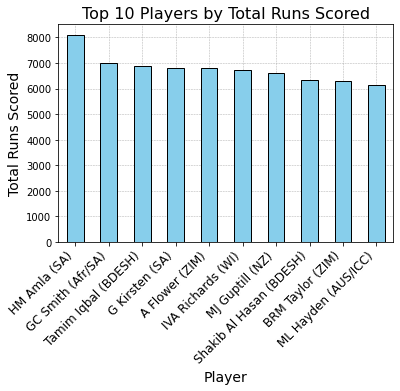

In [129]:
# Plot Top 10 Players by Total Runs Scored
top_10_runs = df_cricket_cleaned.nlargest(10, 'Runs Scored')[['Player', 'Runs Scored']].set_index('Player')

plt.figure(figsize=(12, 8))
ax = top_10_runs.plot(kind='bar', color='skyblue', legend=False, edgecolor='black')
ax.set_title('Top 10 Players by Total Runs Scored', fontsize=16)
ax.set_ylabel('Total Runs Scored', fontsize=14)
ax.set_xlabel('Player', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
plt.show()

<Figure size 1008x576 with 0 Axes>

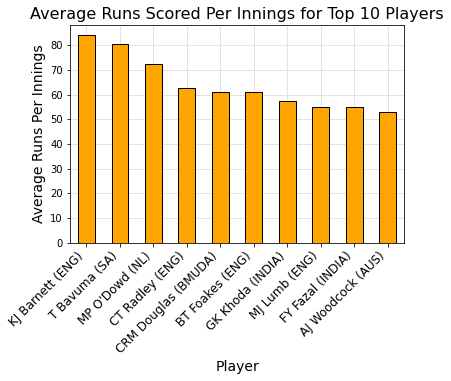

In [130]:
# Calculate average runs scored per innings for each player
df_cricket_cleaned['Average Runs Per Innings'] = df_cricket_cleaned['Runs Scored'] / df_cricket_cleaned['Innings']

# Plot Average Runs Scored Per Innings for Top 10 Players
top_10_avg_runs = df_cricket_cleaned.nlargest(10, 'Average Runs Per Innings')[['Player', 'Average Runs Per Innings']].set_index('Player')

plt.figure(figsize=(14, 8))
ax = top_10_avg_runs.plot(kind='bar', color='orange', legend=False, edgecolor='black')
ax.set_title('Average Runs Scored Per Innings for Top 10 Players', fontsize=16)
ax.set_ylabel('Average Runs Per Innings', fontsize=14)
ax.set_xlabel('Player', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
plt.show()


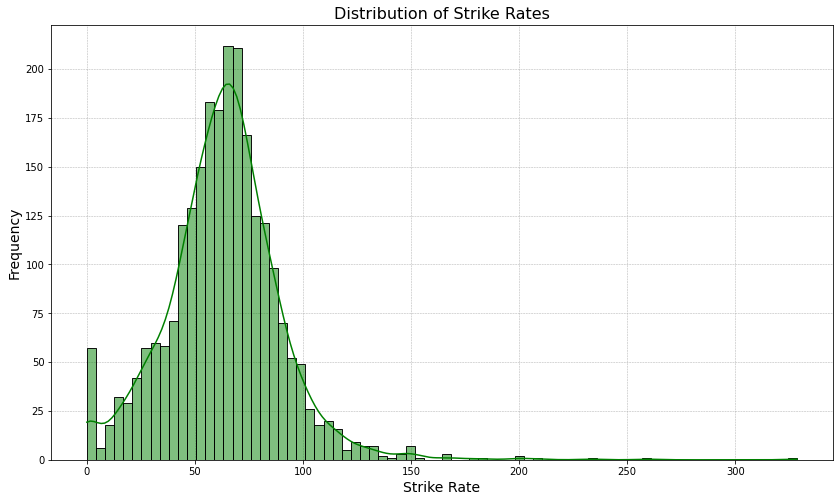

In [131]:
# Plot Distribution of Strike Rates
plt.figure(figsize=(14, 8))
ax = sns.histplot(df_cricket_cleaned['Strike Rate'], kde=True, color='green')
ax.set_title('Distribution of Strike Rates', fontsize=16)
ax.set_xlabel('Strike Rate', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
plt.show()


<Figure size 1008x576 with 0 Axes>

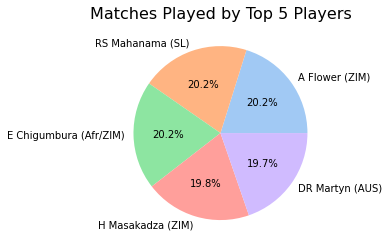

In [132]:
# Plot Pie Chart of Matches Played by Top 5 Players
top_5_matches = df_cricket_cleaned.nlargest(5, 'Matches')[['Player', 'Matches']].set_index('Player')

plt.figure(figsize=(14, 8))
ax = top_5_matches.plot(kind='pie', y='Matches', autopct='%1.1f%%', legend=False, colors=sns.color_palette('pastel'))
ax.set_title('Matches Played by Top 5 Players', fontsize=16)
ax.set_ylabel('')
ax.yaxis.label.set_size(14)
plt.show()


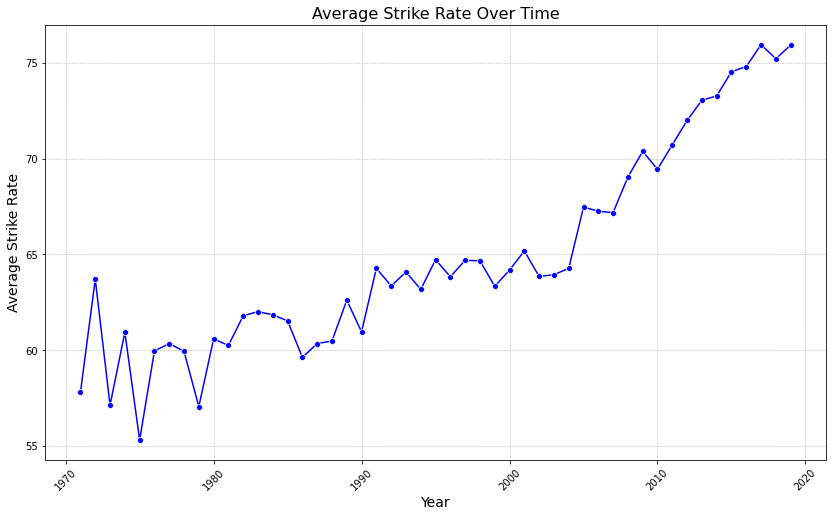

In [133]:

# Generate a DataFrame for each year a player has played with their strike rate
expanded_rows = []

for index, row in df_cricket_cleaned.iterrows():
    for year in range(row['Start Year'], row['End Year'] + 1):
        expanded_rows.append({
            'Year': year,
            'Player': row['Player'],
            'Strike Rate': row['Strike Rate']
        })

expanded_df = pd.DataFrame(expanded_rows)

# Calculate the average strike rate per year
average_sr_per_year = expanded_df.groupby('Year')['Strike Rate'].mean().reset_index()

# Plot the time series graph
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_sr_per_year, x='Year', y='Strike Rate', marker='o', color='b')
plt.title('Average Strike Rate Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Strike Rate', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()


### Explanation of Visualization For Cricket dataset

**Top 10 Players by Total Runs Scored:**

From the 1st bar graph we can say that **Hashim Amla** is the batsman whom have higher runs as compared to others.

**Average Runs Scored Per Innings for Top 10 Players:**

**KJ BARNEET** from England has the best average innings in our dataset

**Distribution of Strike Rates:**

From the histogram the Average strike rate starts from 60-140. Most of the players have the strike rate between 70-120.

**Pie Chart of Matches Played by Top 5 Players:**

The Pie Chart shows the top-5 players with their contributions, like **RS Mahanama**, **A Flower** are the players whom played most of the matches

**Average Strike rate over time:**

From the strike rate graph we can say that in early years like **1970-1980** We generally have lower strike rates and from year **2010-2020** Strike rate is becoming higher which shows that cricket is becoming faster nowadays.

### Visualizations for Crypto Dataset

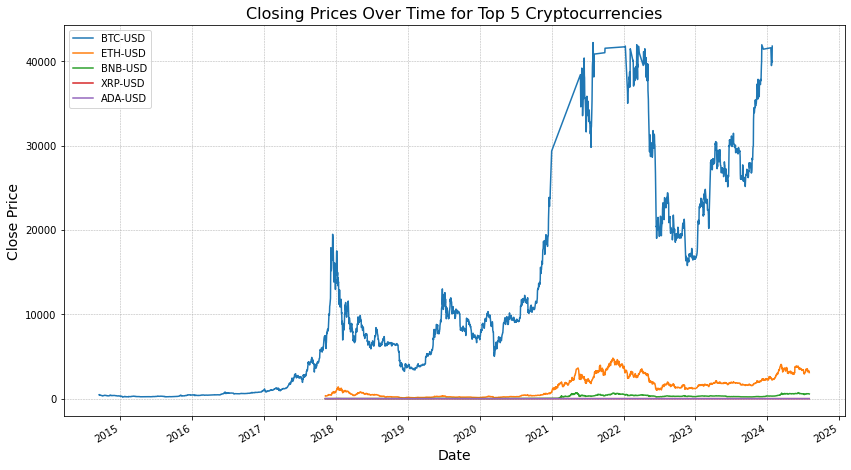

In [134]:

# Plot closing prices over time for top 5 cryptocurrencies
plt.figure(figsize=(14, 8))
for symbol in df_crypto_cleaned['Cryptocurrency Symbol'].unique():
    df_crypto_cleaned[df_crypto_cleaned['Cryptocurrency Symbol'] == symbol]['Closing Price'].plot(label=symbol)
plt.title('Closing Prices Over Time for Top 5 Cryptocurrencies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

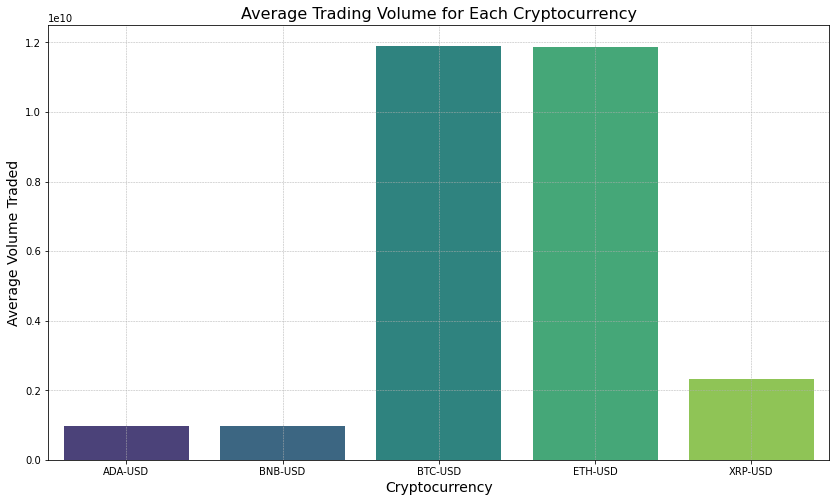

In [135]:
# Calculate average trading volume for each cryptocurrency
avg_volume = df_crypto_cleaned.groupby('Cryptocurrency Symbol')['Trade Volume'].mean().reset_index()

# Plot average trading volume
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_volume, x='Cryptocurrency Symbol', y='Trade Volume', palette='viridis')
plt.title('Average Trading Volume for Each Cryptocurrency', fontsize=16)
plt.xlabel('Cryptocurrency', fontsize=14)
plt.ylabel('Average Volume Traded', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


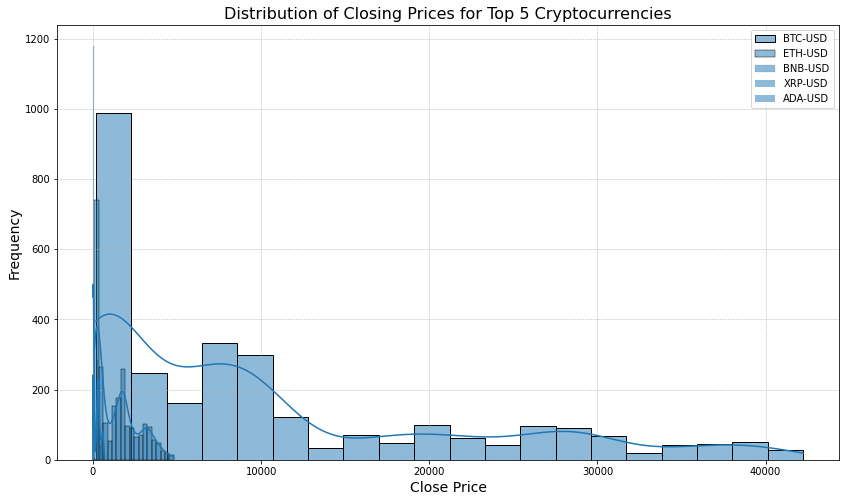

In [136]:
# Plot distribution of closing prices
plt.figure(figsize=(14, 8))
for symbol in df_crypto_cleaned['Cryptocurrency Symbol'].unique():
    sns.histplot(df_crypto_cleaned[df_crypto_cleaned['Cryptocurrency Symbol'] == symbol]['Closing Price'], kde=True, label=symbol)
plt.title('Distribution of Closing Prices for Top 5 Cryptocurrencies', fontsize=16)
plt.xlabel('Close Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


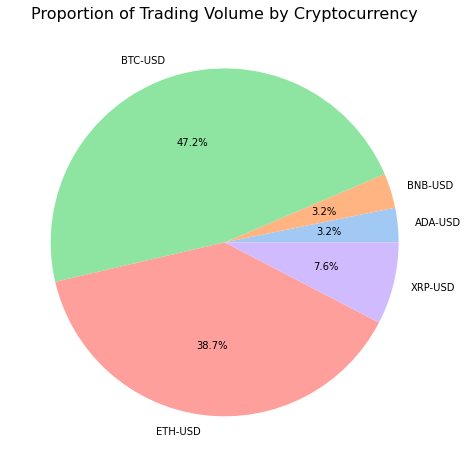

In [137]:
# Calculate total trading volume for each cryptocurrency
total_volume = df_crypto_cleaned.groupby('Cryptocurrency Symbol')['Trade Volume'].sum().reset_index()

# Plot pie chart of trading volume proportions
plt.figure(figsize=(14, 8))
plt.pie(total_volume['Trade Volume'], labels=total_volume['Cryptocurrency Symbol'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Trading Volume by Cryptocurrency', fontsize=16)
plt.show()


### **Explanation of Visualizations**

**Line Chart: Closing Prices Over Time:**

The above line chart shows the closing prices of the top 5 cryptocurrencies over time, allowing us to observe trends and volatility in their prices. We can say that BTC-USD increases their worth overtime.

**Bar Chart: Average Trading Volume:**

This bar chart displays the average trading volume for each cryptocurrency, providing insights into their relative trading activity and popularity. BTC-USD , ETH-USD are more popular according to graph.

**Distribution Plot: Closing Prices Distribution:**

This distribution plot shows the distribution of closing prices for the top 5 cryptocurrencies, helping us understand the price 
ranges and volatility. The BTC-USD coin has the highest closing price round 10,000.

**Pie Chart: Proportion of Trading Volume:**

This pie chart illustrates the proportion of total trading volume attributed to each cryptocurrency, giving a sense of their market share in terms of trading activity.

### **5.2:** Reflection

**Cricket Dataset**
If I had more time to complete the project, I would focus on further investigating data quality issues such as verifying the accuracy of historical records and ensuring there are no duplicate entries. I would also explore additional research questions, such as analyzing the impact of a player's batting position on their performance and examining the correlation between player experience and performance consistency. Additionally, I would consider incorporating more advanced statistical methods to identify patterns and trends in player performance over time.

**Cryptocurrency Dataset**
With additional time, I would delve deeper into structural issues, such as handling potential missing data more robustly and ensuring data consistency across different sources. I would also explore more research questions, such as examining the influence of external market events on cryptocurrency prices and analyzing the relationship between trading volume and price volatility. Moreover, I would consider implementing more sophisticated time-series analysis techniques to predict future price movements and better understand market dynamics.